# Practical Machine Learning for Physicists


## Markov Processes
In the optional video we introduced three types of Markov Process which all made use of the Markov Property:

A state $S_t$ is *Markov* if and only if 
$$ P\left[S_{t+1} | S_{t} \right] = P\left[S_{t+1} | S_1, \cdots, S_{t} \right] $$

That is the state captures all of the relevant information from the history. We do not need to store the history of the states only the current state.

> "The future is independent of the past given the present"

### Markov Chain
A *Markov Chain* is a tuple $<\mathcal{S},\mathcal{P}>$ where
- $\mathcal{S}$ is the finite set of states
- $\mathcal{P}$ is the state transition probability matrix
$$\mathcal{P}_{ss^\prime} = \mathbb{P}\left[S_{t+1}=s^\prime | S_t = s\right]$$

### Markov Reward Process
A *Markov Reward Process* (MRP) is a Markov chain with values $<\mathcal{S},\mathcal{P}, \mathcal{R}, \gamma>$
- $\mathcal{R}$ is the reward function, $\mathcal{R}_s=\mathbb{E}\left[R_{t+1} | S_t=s\right]$
- $\gamma$ is the discount factor $0 \leq \gamma \leq 1$

### Return
The return $G_t$ is the total discounted reward from the future
$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = \sum_{i=0}^\infty \gamma^i R_{t+i+1}$$

### Value Function
The value function $v(s)$ is the expected return value startong from state $s$
$$ v(s) = \mathbb{E}\left[ G_t | S_t=s\right] $$



### Bellman Equation for Markov Reward Processes
We can decompose the value function into two parts:
- immediate reward $R_{t+1}$
- discounted value of next state $\gamma v\left(S_{t+1}\right)$
$$v(s) = \mathbb{E} \left[R_{t+1} + \gamma v\left(S_{t+1}\right) | S_t=s\right] $$

Or in matrix form using $v_{t+1}=\mathcal{P} v_t$ and dropping the indices for cleanliness
$$ v = \mathcal{R} + \gamma \mathcal{P} v $$

#### Solving the Bellman Equation for MRPs
The Bellman equation is a soluble linear equation with solution
$$ v = \left(I - \gamma \mathcal{P}\right)^{-1} \mathcal{R}$$

The computational complexity is $O(n^3)$ for $n$ states, so the direct solution is only possible for small MRPs. For large MRPs we need to use iterative methods to get the solution.

### Markov Decision Process
A *Markov Decision Process* (MDP) is a Markov reward process with decisions. The tuple is $<\mathcal{S},\mathcal{A}, \mathcal{P}, 
\mathcal{R}, \gamma>$
- $\mathcal{S}$ is the finite set of states
- $\mathcal{A}$ is the finite set of actions
- $\mathcal{P}$ is the state transition probability matrix
$$\mathcal{P^a}_{ss^\prime} = \mathbb{P}\left[S_{t+1}=s^\prime | S_t = s, A_t=a\right]$$
- $\mathcal{R}$ is the reward function, $\mathcal{R}^a_s=\mathbb{E}\left[R_{t+1} | S_t=s, A_t=a\right]$
- $\gamma$ is the discount factor $0 \leq \gamma \leq 1$

### Policies
A *policy* $\pi$ is a distribution over actions given states
$$ \pi(a|s) = \mathbb{P} \left[ A_t=a | S_t=s \right]$$

The policy fully defines the behaviour of the agent. The policies (like all things Markov) depend on the state and not on the history.

A policy can reduce a Markov Decision Process to a Markov Reward Process  $<\mathcal{S}, \mathcal{P}^\pi, 
\mathcal{R}^\pi, \gamma>$ where
$$P^{\pi}_{ss^\prime}=\sum_{a \in A} \pi \left(a|s\right)P^a_{ss^\prime}$$
$$R^{\pi}_{ss^\prime}=\sum_{a \in A} \pi \left(a|s\right)R^a_{ss^\prime}$$

### Value Functions
The *state-value function* is the expected reutrn from state $s$ if policy $\pi$ is followed
$$v_\pi(s) = \mathbb{E}_\pi \left[ G_t | S_t=s \right]$$

The *action-value function* is the expected return from state $s$, taking action $a$, if policy $\pi$ is followed
$$q_\pi(s,a) = \mathbb{E}_\pi \left[ G_t | S_t=s,A_t=a \right]$$

### Optimal Value functions
The optimal state-value function $v_*(s)$
$$v_*(s) = \max_\pi v_\pi (s)$$

The optimal action-value function $q_* (s,a)$
$$q_*(s,a) = \max_\pi q_\pi (s,a)$$


### Bellman Optimality Equations
There are optimality equations for both the state-value and action-value functions. They both involve selecting the action that gives the maximum reward and summing over the states
$$v_*(s) = \max_a \mathcal{R}^a_s + \gamma \sum_{s^\prime \in S} \mathcal{P}^{a}_{s s^\prime} v_* (s^\prime)$$
$$q_*(s,a) = \mathcal{R}^a_s + \gamma \sum_{s^\prime \in S} \mathcal{P}^{a}_{s s^\prime} \max_{a^\prime} q_* (s^\prime, a^\prime)$$

### Dynamic Programming

#### Iterative Policy Evaluation
How do we evaluate a given policy $\pi$? Evaluating the policy is  the same as determining the value function $v_\pi$.

In psuedo-code what we want to do is
- Loop over iteration $i$
    - Loop over all the states in $s \in S$
    - Update the value function $v_{k+1}(s)$ from $v_k(s^\prime)$
$$ v_{k+1}(s) = \sum_{a \in \mathcal{A} } \pi(a | s) \left( \mathcal{R}^a_s + \gamma \sum_{s^\prime \in \mathcal{S}} \mathcal{P}^a_{ss^\prime} v_k(s^\prime) \right) $$
Or in matrix notation
$$\mathbf{v}^{k+1} = \mathbf{\mathcal{R}}^\pi + \gamma \mathbf{\mathcal{P}}^\pi \mathbf{v}^k $$




In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

#For silly animations
from IPython.display import clear_output
from time import sleep

In [180]:
def plotGridWorld(cellText,showCorners, title=None, applyFormat=False):
    fig, ax = plt.subplots(figsize=(2,2))
    ax.axis('tight')
    ax.axis('off')
    nRow=cellText.shape[0]
    nCol=cellText.shape[1]
    cellColor=np.zeros((nRow,nCol))

    
    if applyFormat:
        # Format table numbers as string
        cellText = [['%.2f' % j for j in i] for i in cellText]

    the_table = ax.table(cellText,loc='center',cellLoc='center')
    for pos, cell in the_table._cells.items():
        if not showCorners:
            if (pos == (0,0) or pos == (nRow-1,nCol-1)):
                cell.set_text_props(color='grey')
                cell.set_color('grey') 
                cell.set_edgecolor('black')        
        cell._height = cell._width = 0.25
    if title:
        ax.set_title(title)

### Small Gridworld

The small gridworld consists of a $4 \times 4$ grid array with terminal goal states in the top-left and bottom-right corners. The rules of gridworld are:
- $-1$ reward each step
- stop when you reach the terminal goal state (hence the terminal)
- actions leading out of the grid leave the state unchanged (but still cost $-1$)


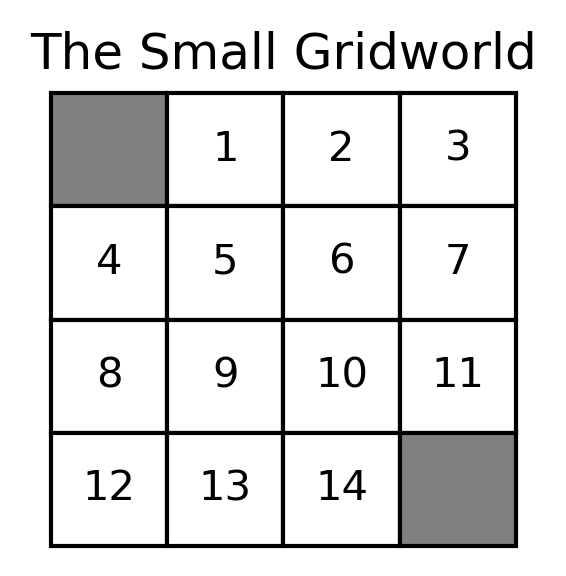

In [181]:
cellText=np.arange(16)
cellText=cellText.reshape((4,4))
plotGridWorld(cellText,title="The Small Gridworld",showCorners=False)

### Random policy
Following a random policy we had have equal odds of moving in any given direction. This means that a policy of any action in any states is $\pi(a|s)=0.25$ since there are four directions we can move in and we have equal odds of each direction.

$$ v_{k+1}(s) = \sum_{a \in \mathcal{A} }0.25  \left( \mathcal{R}^a_s + \gamma v_k(s^\prime) \right) $$
where $s^\prime$ is the state thate we end up in following action $a$ from state $s$. So if we start in state 10 and following action up we end up in state 6.


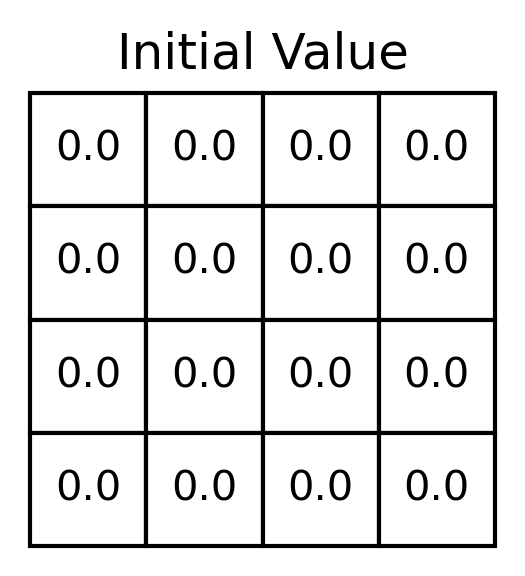

In [182]:
vk=np.zeros((4,4))
plotGridWorld(vk,showCorners=True,title="Initial Value")

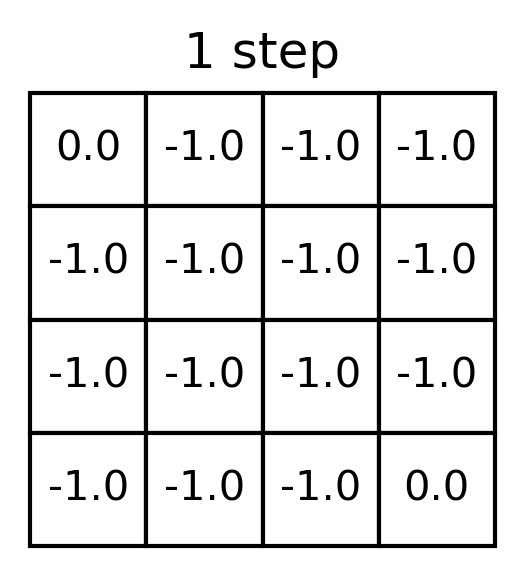

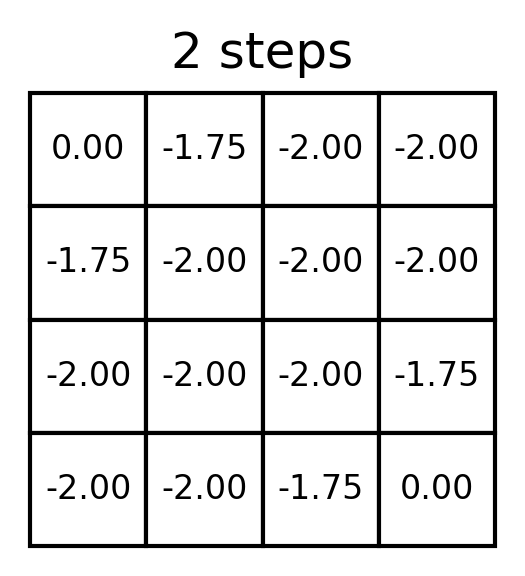

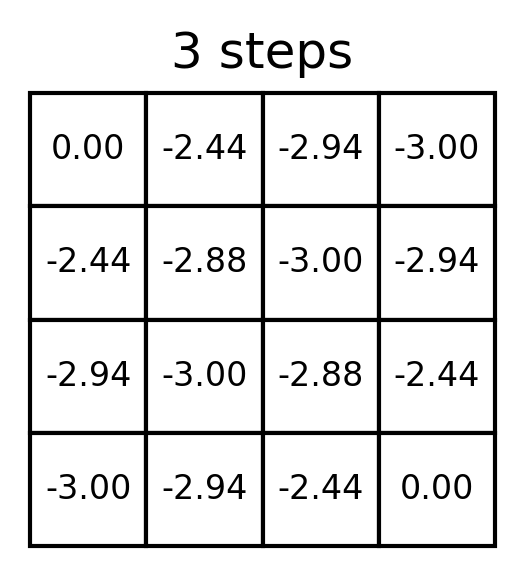

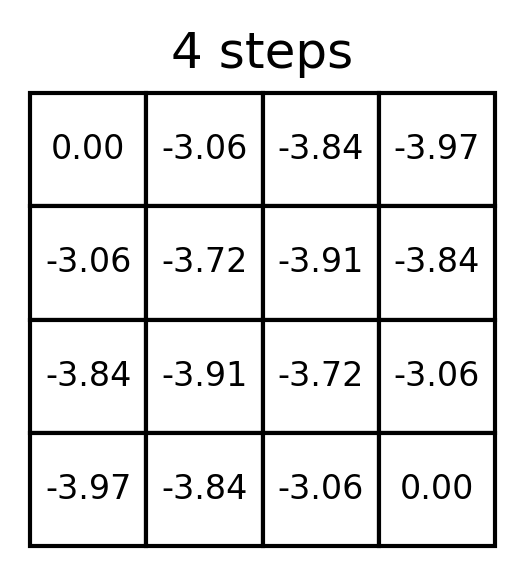

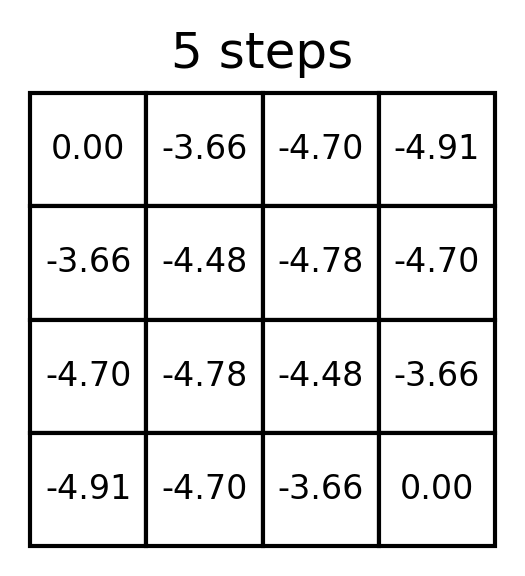

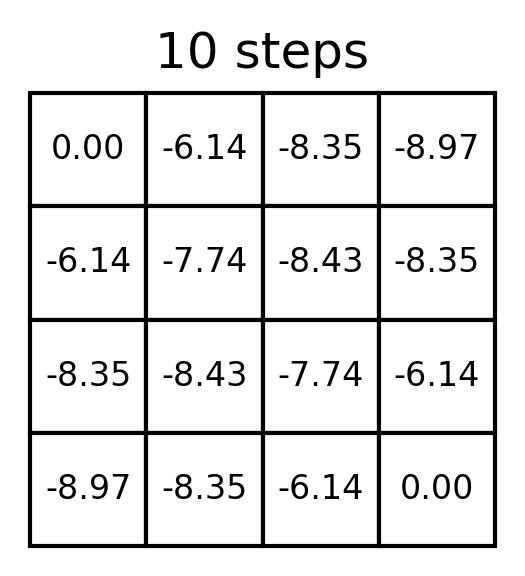

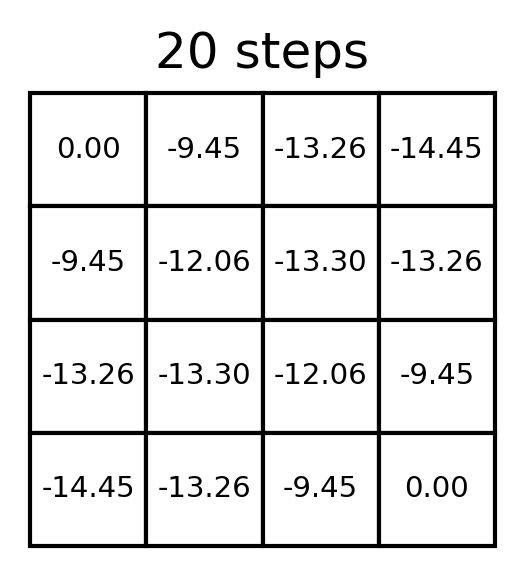

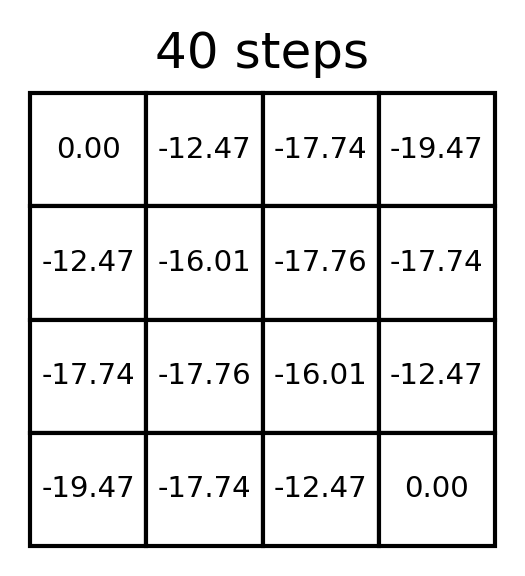

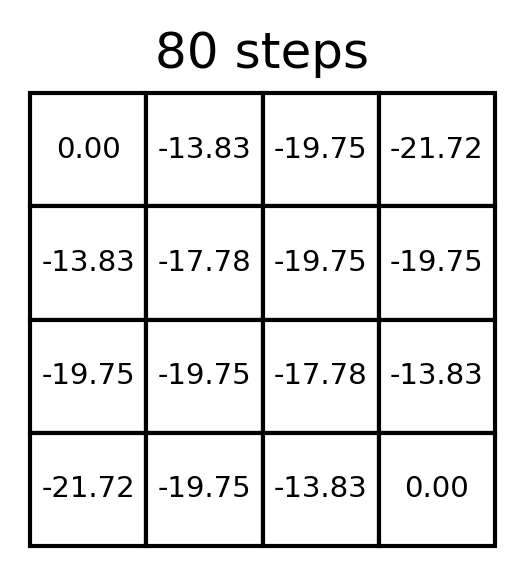

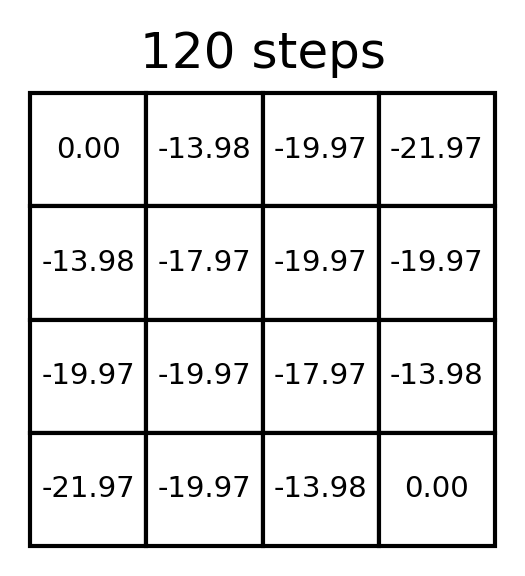

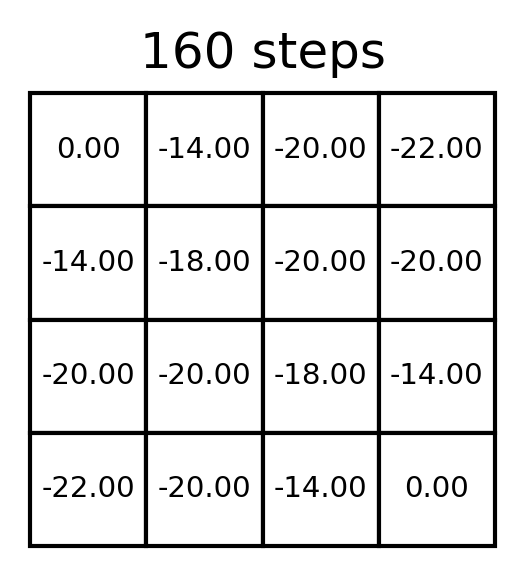

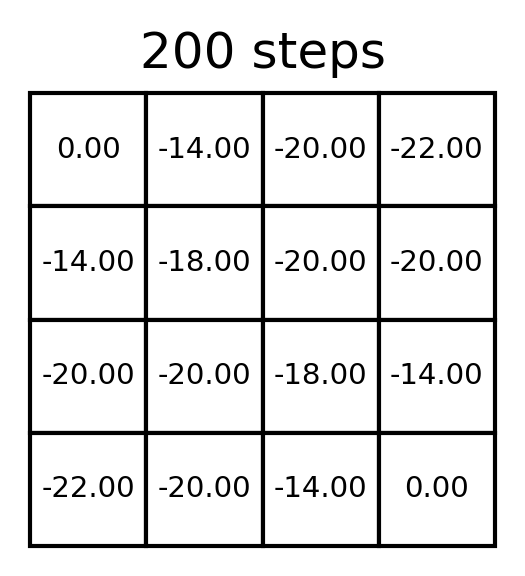

In [121]:
#Unneccesarily verbose and loopy for clarity
def updateVk(vk):
    nRow=vl.shape[0]
    nCol=vl.shape[1]
    vl=np.zeros((nRow,nCol))
    for row in range(nRow):
        for col in range(nCol):
            #Check if we are in terminal state
            if (row==0 and col==0) or (row==nRow-1 and col==nCol-1):
                continue
            
            #Update our value based on the Bellman equation
            vl[row][col]=-1
            vl[row][col]+=0.25*vk[row][min(nCol-1,col+1)] #Up
            vl[row][col]+=0.25*vk[row][max(0,col-1)] #Down
            vl[row][col]+=0.25*vk[max(0,row-1)][col] #Left
            vl[row][col]+=0.25*vk[min(nRow-1,row+1)][col] #Right
    return vl

#Reset the value to all zeros
vk=np.zeros((4,4))
vk=updateVk(vk) #Do first update
plotGridWorld(vk,showCorners=True,title="1 step")

plotHere=[2,3,4,5,10,20,40,80,120,160,200]
for i in range(2,201):
    vk=updateVk(vk)
    if i in plotHere:
        plotGridWorld(vk,showCorners=True,title=str(i)+" steps",applyFormat=True)


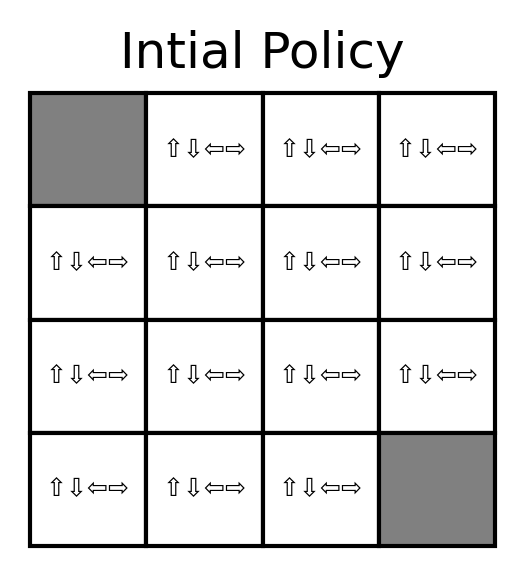

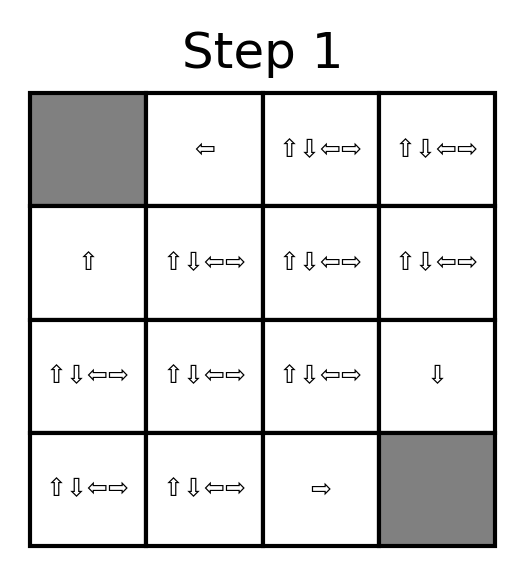

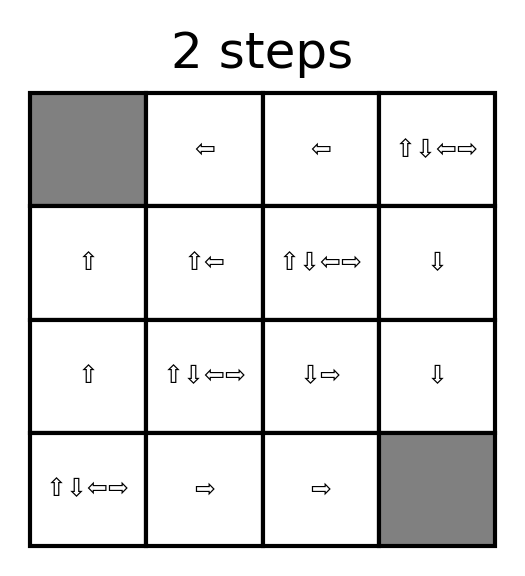

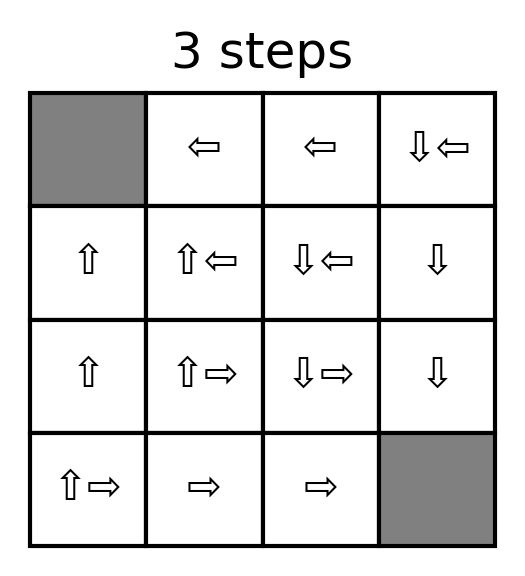

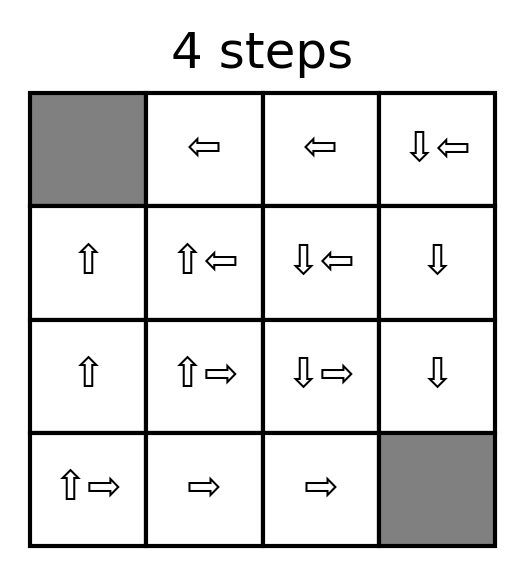

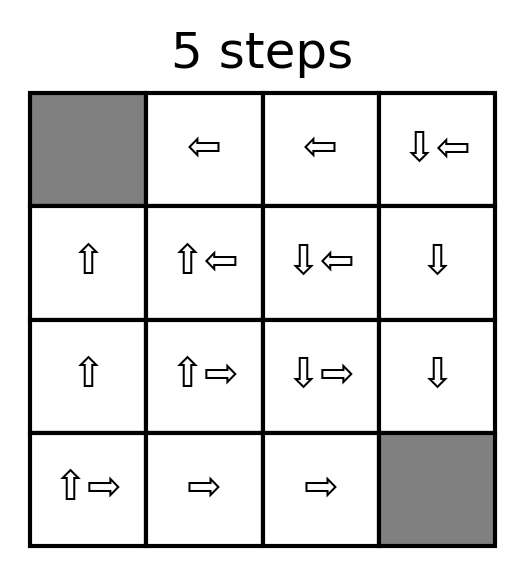

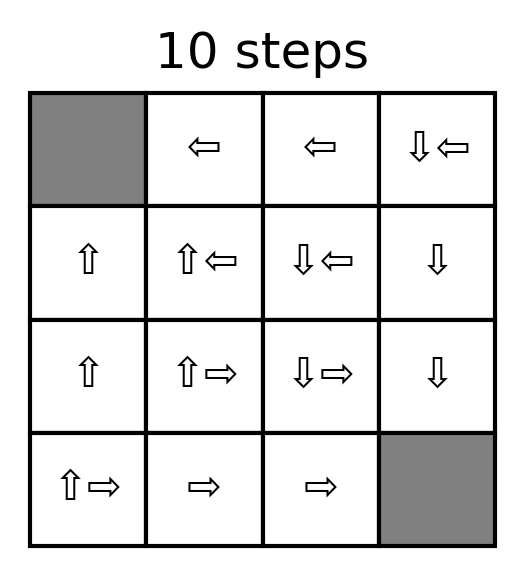

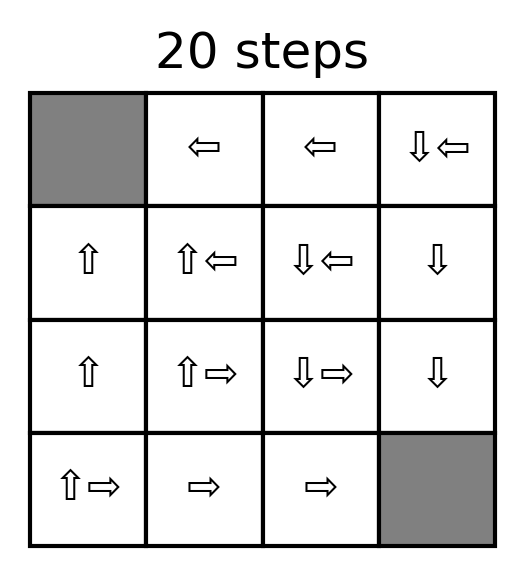

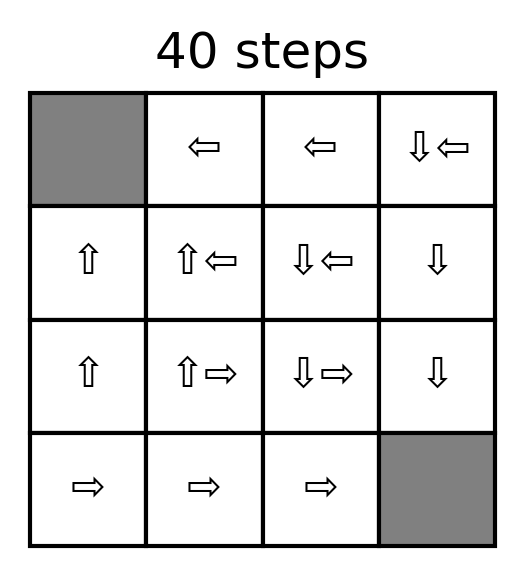

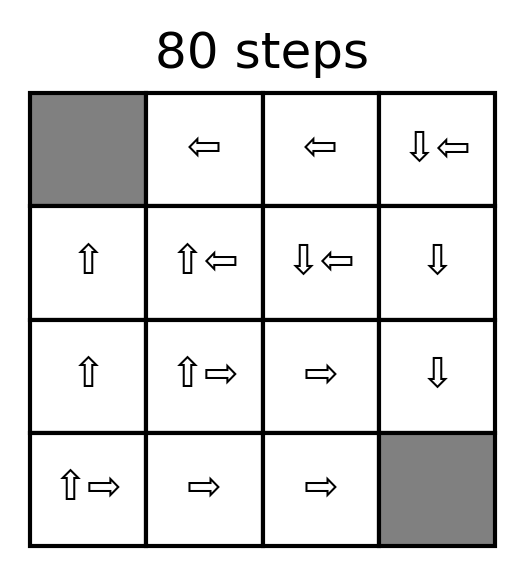

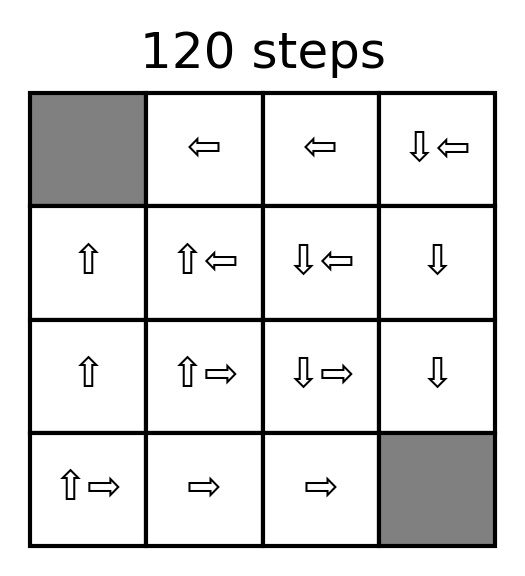

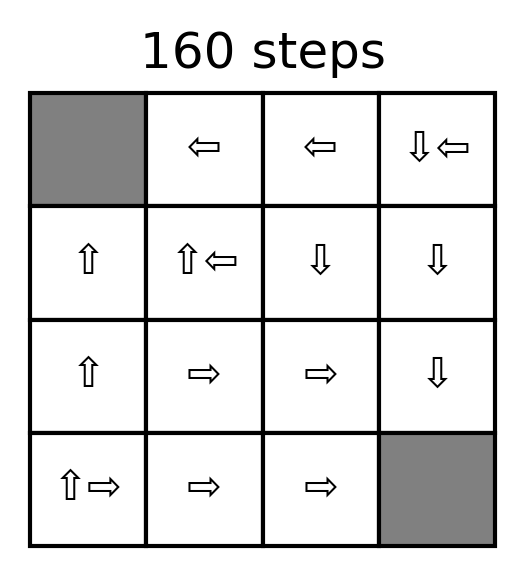

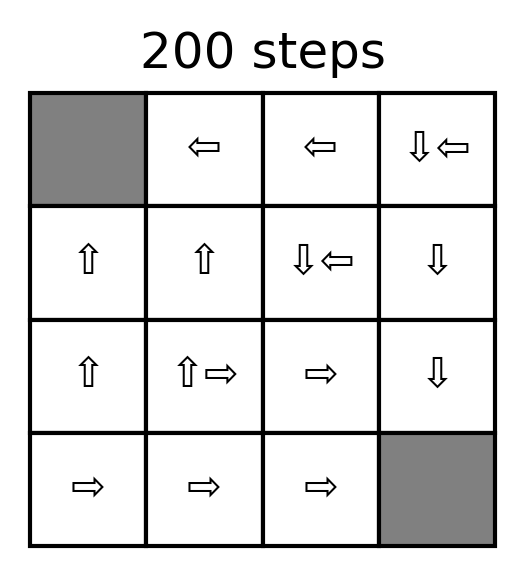

In [175]:
vk=np.zeros((4,4))
def defineGreedyPolicy(vk):
    arrows='⇧⇩⇦⇨'
    nRow=vk.shape[0]
    nCol=vk.shape[1]
    vl=[arrows]*16
    vl=np.reshape(vl,(nRow,nCol))
    for row in range(vl.shape[0]):
        for col in range(vl.shape[1]):
            #Check if we are in terminal state
            if (row==0 and col==0) or (row==nRow-1 and col==nCol-1):
                vl[row][col]=""
                continue
            #Update our policy based on the current value of the cells nearby
            dirs=[
                vk[max(0,row-1)][col], #Up
                vk[min(nRow-1,row+1)][col], #Down
                vk[row][max(0,col-1)], #Left
                vk[row][min(nCol-1,col+1)]] #Right
                
            maxVal=np.max(dirs)
            #print(row,col,dirs)
            val=''
            for i in range(4):
                if dirs[i] >= maxVal:
                    val+=arrows[i]
            vl[row][col]=val
            
    return vl

policy=defineGreedyPolicy(vk)
plotGridWorld(policy,showCorners=False,title="Intial Policy")
vk=np.zeros((4,4))

vk=updateVk(vk) #Do first update
policy=defineGreedyPolicy(vk)
plotGridWorld(policy,showCorners=False,title="Step 1")


plotHere=[2,3,4,5,10,20,40,80,120,160,200]
for i in range(2,201):
    vk=updateVk(vk)
    policy=defineGreedyPolicy(vk)
    if i in plotHere:
        plotGridWorld(policy,showCorners=False,title=str(i)+" steps")

